In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

C:\Users\UTKARSH\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.13.0-dev20190130


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

len(train_labels)

train_labels

test_images.shape

len(test_labels)

10000

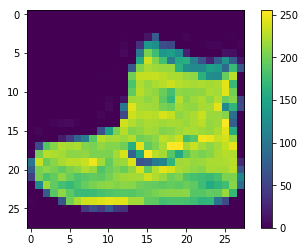

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

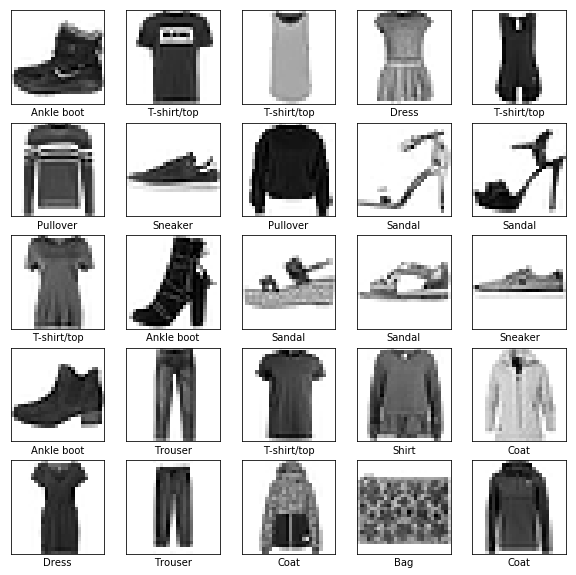

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# The first layer in this network, tf.keras.layers.Flatten, 
# transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels
# This layer has no parameters to learn; it only reformats the data.


# After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers.
# These are densely-connected, or fully-connected, neural layers.
# The first Dense layer has 128 nodes (or neurons).
# The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1.
# Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

W0322 22:38:43.046961 15204 deprecation.py:506] From C:\Users\UTKARSH\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1253: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Loss function —This measures how accurate the model is during training. We want to minimize this function
# to "steer" the model in the right direction.

# Optimizer —This is how the model is updated based on the data it sees and its loss function.

# Metrics —Used to monitor the training and testing steps. The given example uses accuracy,
# the fraction of the images that are correctly classified.

W0322 22:38:43.110827 15204 deprecation.py:506] From C:\Users\UTKARSH\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer_utils.py:123: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
model.fit(train_images, train_labels, epochs=5)

# Feed the training data to the model—in this example, the train_images and train_labels arrays.

# The model learns to associate images and labels.

# We ask the model to make predictions about a test set—in this example, the test_images array.
# We verify that the predictions match the labels from the test_labels array.

# As the model trains, the loss and accuracy metrics are displayed.
# This model reaches an accuracy of about 0.88 (or 88%) on the training data.

Epoch 1/5
60000/60000==============================] - 2s 42us/sample - loss: 0.4971 - acc: 0.8249
Epoch 2/5
60000/60000==============================] - 2s 37us/sample - loss: 0.3715 - acc: 0.8660
Epoch 3/5
60000/60000==============================] - 2s 37us/sample - loss: 0.3362 - acc: 0.8762
Epoch 4/5
60000/60000==============================] - 2s 37us/sample - loss: 0.3119 - acc: 0.8856
Epoch 5/5
60000/60000==============================] - 2s 37us/sample - loss: 0.2931 - acc: 0.8921


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset.
# This gap between training accuracy and test accuracy is an example of overfitting.
# Overfitting is when a machine learning model performs worse on new data than on their training data.

10000/10000==============================] - 0s 26us/sample - loss: 0.3611 - acc: 0.8659
Test loss: 0.3610844805955887
Test accuracy: 0.8659


In [12]:
predictions = model.predict(test_images)
predictions[0]

# A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds
# to each of the 10 different articles of clothing. We can see which label has the highest confidence value:

array([5.8701768e-05, 3.4590780e-08, 7.0121934e-07, 1.1979367e-07,
       3.8626749e-07, 2.8609395e-02, 5.1905106e-05, 5.2970611e-02,
       8.8162808e-05, 9.1821998e-01], dtype=float32)

In [13]:
np.argmax(predictions[0])

9

In [14]:
test_labels[0:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [15]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

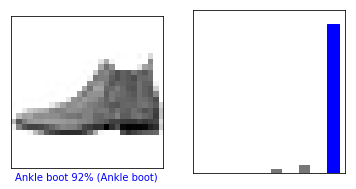

In [16]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

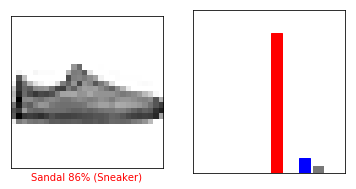

In [17]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

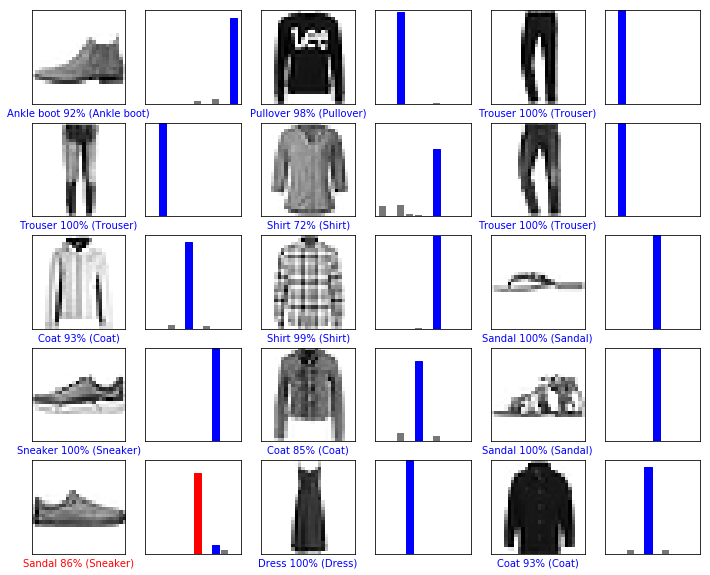

In [18]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [19]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [20]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [21]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.8701709e-05 3.4590780e-08 7.0121865e-07 1.1979401e-07 3.8626823e-07
  2.8609369e-02 5.1905008e-05 5.2970584e-02 8.8162975e-05 9.1821998e-01]]


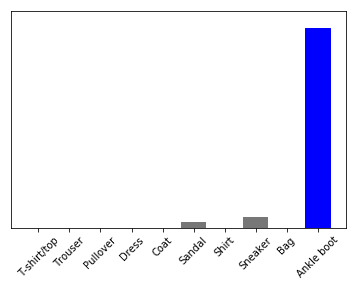

In [22]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [23]:
np.argmax(predictions_single[0])

9

In [24]:
print("100")

100
